# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Import dataSet

In [2]:
data=pd.read_csv('C:/Users/User/Desktop/NEVTTC/MACHINE LEARNING/Supervised Learning/MLRegression/polynomial regression.csv')

In [3]:
data.head()

,Position,Level,Salary
0,Business analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# Exploratory data Analysis

In [4]:
data.describe().round()

,Level,Salary
count,10.0,10.0
mean,6.0,249500.0
std,3.0,299374.0
min,1.0,45000.0
25%,3.0,65000.0
50%,6.0,130000.0
75%,8.0,275000.0
max,10.0,1000000.0


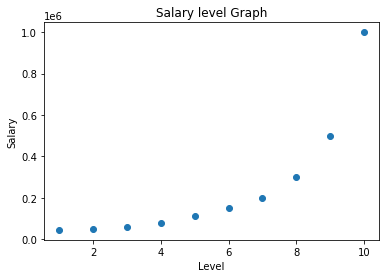

In [62]:
# Exploratory Data Analysis
plt.scatter(data['Level'] ,data['Salary'])
plt.xlabel('Level' )
plt.ylabel('Salary' )
plt.title('Salary level Graph')
plt.show()

# Data Preprocessing

In [6]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [7]:
data.isnull().sum().sum()

0

<AxesSubplot:>

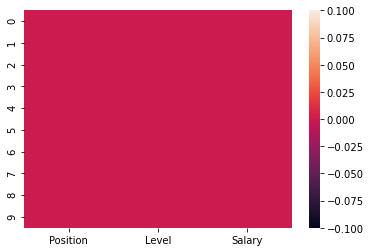

In [8]:
sns.heatmap(data.isnull())

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

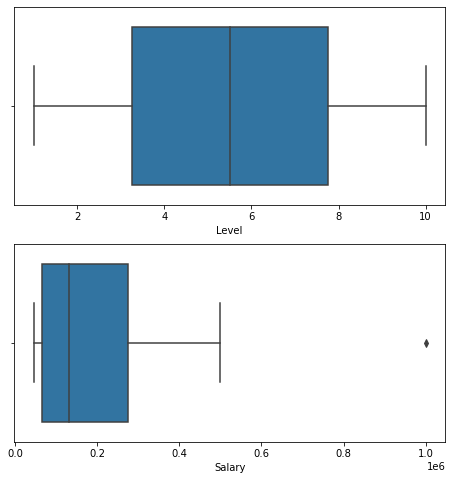

In [9]:
plt.figure(figsize=(17,8))
plt.subplot(2,2,1)
sns.boxplot(data['Level'])

plt.subplot(2,2,3)
sns.boxplot(data['Salary'])

# Split data set

In [10]:
#Extracting Independent and dependent variable
x=data[['Level']]
#x = data.iloc[:, 1:2].values
#y = data.iloc[:, 2].values
y= data[['Salary']]

In [11]:
x.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [12]:
y.head()

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000


# test or train

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train ,y_test =train_test_split(x,y, test_size=0.2 , random_state=0)

# Fitting the Linear Regression


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x,y)
model

LinearRegression()

In [15]:
model.predict([[6.5]])

array([[330378.78787879]])

# Visulaizing the result for Linear Regression Model

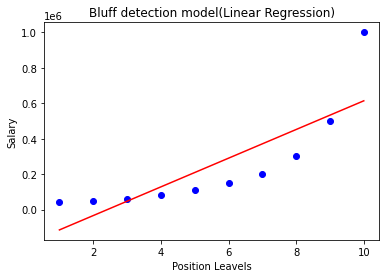

In [16]:
#Visulaizing the result for Linear Regression Model
plt.scatter(x,y, color="blue")
plt.plot(x,model.predict(x), color="red")
plt.title("Bluff detection model(Linear Regression)")
plt.xlabel("Position Leavels")
plt.ylabel("Salary")
plt.show()

In [17]:
diff = {'Actual_value' : y , "predicted Value": model.predict(x) }
diff

{'Actual_value':     Salary
 0    45000
 1    50000
 2    60000
 3    80000
 4   110000
 5   150000
 6   200000
 7   300000
 8   500000
 9  1000000,
 'predicted Value': array([[-114454.54545455],
        [ -33575.75757576],
        [  47303.03030303],
        [ 128181.81818182],
        [ 209060.60606061],
        [ 289939.39393939],
        [ 370818.18181818],
        [ 451696.96969697],
        [ 532575.75757576],
        [ 613454.54545455]])}

# Model Evaluation

In [45]:
model.score(x_train,y_train)



0.624399196310701

In [46]:
model.score(x_test , y_test)

0.987371972922311

# Fitting the Polynomial Regression to the dataset


In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_regs = PolynomialFeatures(degree=2)
x_poly = poly_regs.fit_transform (x)
lr= LinearRegression().fit(x_poly,y)
lr
#lin_regs_2 = LinearRegression()
#lin_regs_2.fit(x_poly,y)

LinearRegression()

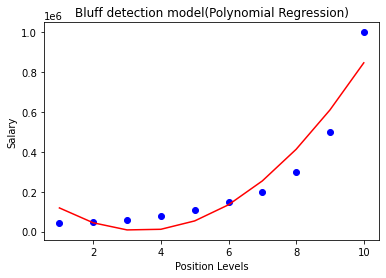

In [21]:
#Visulaizing the result for Polynomial Regression
plt.scatter(x,y,color="blue")
plt.plot(x, lr.predict(poly_regs.fit_transform(x)), color="red")
plt.title("Bluff detection model(Polynomial Regression)")
plt.xlabel("Position Levels")
plt.ylabel("Salary")
plt.show()

In [22]:
diff1 = {'Actual_value' : y , "predicted Value": lr.predict(poly_regs.fit_transform(x)) }
diff1

{'Actual_value':     Salary
 0    45000
 1    50000
 2    60000
 3    80000
 4   110000
 5   150000
 6   200000
 7   300000
 8   500000
 9  1000000,
 'predicted Value': array([[118727.27272727],
        [ 44151.51515151],
        [  8439.39393939],
        [ 11590.90909091],
        [ 53606.06060606],
        [134484.84848485],
        [254227.27272727],
        [412833.33333333],
        [610303.03030303],
        [846636.36363636]])}

In [59]:
lr.coef_

array([[      0.        , -132871.21212121,   19431.81818182]])

In [60]:
lr.intercept_

array([232166.66666667])

# Over fit model

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_regs1 = PolynomialFeatures(degree=2)
x_poly1 = poly_regs1.fit_transform (x)
lr1= LinearRegression().fit(x_poly1,y)
lr1
#lin_regs_2 = LinearRegression()
#lin_regs_2.fit(x_poly,y)

LinearRegression()

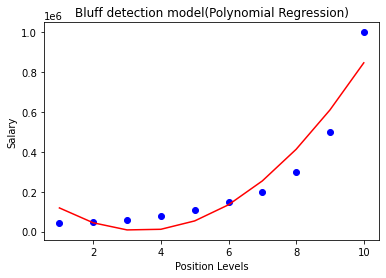

In [25]:
#Visulaizing the result for Polynomial Regression
plt.scatter(x,y,color="blue")
plt.plot(x, lr1.predict(poly_regs1.fit_transform(x)), color="red")
plt.title("Bluff detection model(Polynomial Regression)")
plt.xlabel("Position Levels")
plt.ylabel("Salary")
plt.show()

In [26]:
diff1 = {'Actual_value' : y , "predicted Value": lr1.predict(poly_regs1.fit_transform(x)) }
diff1

{'Actual_value':     Salary
 0    45000
 1    50000
 2    60000
 3    80000
 4   110000
 5   150000
 6   200000
 7   300000
 8   500000
 9  1000000,
 'predicted Value': array([[118727.27272727],
        [ 44151.51515151],
        [  8439.39393939],
        [ 11590.90909091],
        [ 53606.06060606],
        [134484.84848485],
        [254227.27272727],
        [412833.33333333],
        [610303.03030303],
        [846636.36363636]])}

In [ ]:
lr.predict(poly_regs.fit_transform([[7.8]]))

In [48]:
from sklearn import metrics
print('r square =' , metrics.r2_score(y, model.predict(x)) )

r square = 0.6690412331929895


In [56]:
r2 =metrics.r2_score(y, model.predict(x))
print('Adjusted r2', 1-((1-r2)*(10-1)/(10-1-1)) )

Adjusted r2 0.6276713873421131
